### Get the example data at: 
https://doi.org/10.6084/m9.figshare.12646217

In [1]:
import devicely
from datetime import timedelta

In [2]:
tag_file = 'data/Tags/tags.csv'
empatica_folder = 'data/Empatica'
faros_folder = 'data/Faros'
everion_folder = 'data/Everion'
spacelabs_file = 'data/SpaceLabs/spacelabs.abp'
shimmer_file = 'data/Shimmer/shimmer.csv'

### Read Tags Data

In [3]:
tags = devicely.TagReader(tag_file, timeshift=1)
tags.data

,tag
time,
2019-03-01 15:16:37,Shake
2019-03-01 15:17:43,Start
2019-03-01 15:18:20,BP Measurement
2019-03-01 15:19:51,BP Measurement
2019-03-01 15:22:00,BP Measurement
2019-03-01 15:23:34,BP Measurement
2019-03-01 15:25:07,BP Measurement
2019-03-01 15:26:14,Stress Test Start
2019-03-01 15:31:00,Stress Test End


### Read Bittium Faros 180 Data

In [4]:
faros = devicely.FarosReader(faros_folder, timeshift=1)
faros.data.head()

,ECG,HRV,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,acc_mag
2019-03-01 15:12:42.000,26.0,0.0,164.0,23.0,-1172.0,1183.64226
2019-03-01 15:12:42.001,-6.0,NaN,NaN,NaN,NaN,NaN
2019-03-01 15:12:42.002,-31.0,NaN,NaN,NaN,NaN,NaN
2019-03-01 15:12:42.003,-39.0,NaN,NaN,NaN,NaN,NaN
2019-03-01 15:12:42.004,-17.0,NaN,NaN,NaN,NaN,NaN


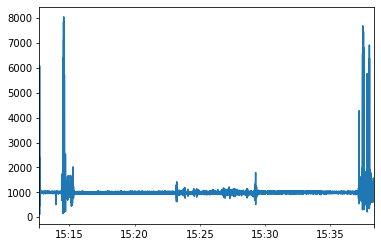

In [5]:
faros.data['acc_mag'].interpolate(method="time").plot()

### Read Empatica E4 Data

In [9]:
empatica = devicely.EmpaticaReader(empatica_folder)

In [17]:
empatica.sample_freqs
empatica.start_times

{'bvp': Timestamp('2019-03-01 15:15:01'),
 'eda': Timestamp('2019-03-01 15:15:01'),
 'hr': Timestamp('2019-03-01 15:15:11'),
 'temp': Timestamp('2019-03-01 15:15:01'),
 'acc': Timestamp('2019-03-01 15:15:01'),
 'ibi': Timestamp('2019-03-01 15:15:01')}

In [11]:
empatica.ACC
empatica.EDA
empatica.BVP
empatica.HR
empatica.TEMP
empatica.IBI.head()

,timedeltas,ibis
0,00:02:25.631666,00:00:00.625090
1,00:02:26.522332,00:00:00.890666
2,00:02:31.725695,00:00:01.062548
3,00:02:32.835121,00:00:01.109426
4,00:02:33.710161,00:00:00.875040


In [12]:
empatica.data.head()

,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp
2019-03-01 15:15:01.000000,-1.0,65.0,5.0,65.199693,-0.0,0.0,NaN,23.75
2019-03-01 15:15:01.015625,NaN,NaN,NaN,NaN,-0.0,NaN,NaN,NaN
2019-03-01 15:15:01.031250,-1.0,65.0,5.0,65.199693,-0.0,NaN,NaN,NaN
2019-03-01 15:15:01.046875,NaN,NaN,NaN,NaN,-0.0,NaN,NaN,NaN
2019-03-01 15:15:01.062500,-1.0,65.0,4.0,65.130638,-0.0,NaN,NaN,NaN


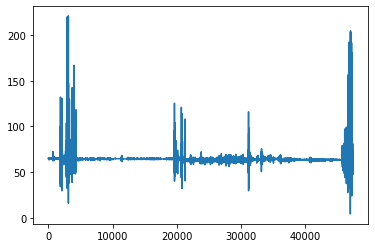

In [15]:
empatica.ACC['acc_mag'].interpolate(method="time").plot()

### Read Biovotion Everion Data

In [8]:
everion = devicely.EverionReader(everion_folder)

Reading processed and raw data.


In [9]:
everion.data.head(1)

,heart_rate,heart_rate_quality,oxygen_saturation,oxygen_saturation_quality,heart_rate_variability,heart_rate_variability_quality,respiration_rate,respiration_rate_quality,ctemp,ctemp_quality,...,led1_data,led2_data,led3_data,led4_data,accx_data,accy_data,accz_data,inter_pulse_interval,inter_pulse_interval_deviation,acc_mag
time,,,,,,,,,,,,,,,,,,,,,
2019-03-01 13:23:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3028.0,2989.0,2924.0,3340.0,368.0,2096.0,-3536.0,NaN,NaN,4126.976617


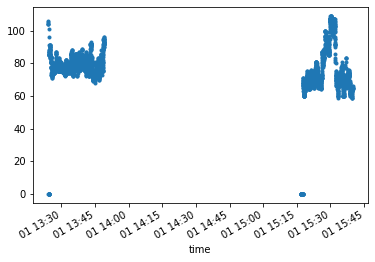

In [10]:
everion.data['heart_rate'].plot(style='.')

### Read Spacelabs

In [11]:
spacelabs = devicely.SpacelabsReader(spacelabs_file, timeshift=1)
spacelabs.data.head()

,date,time,subject,SYS(mmHg),DIA(mmHg),x,y,z,error,stress_test
datetime,,,,,,,,,,
2019-03-01 15:18:00,2019-03-01,16:18:00,001V0,107,76,78.0,78.0,NaN,NaN,NaN
2019-03-01 15:19:00,2019-03-01,16:19:00,001V0,96,62,63.0,63.0,NaN,NaN,NaN
2019-03-01 15:22:00,2019-03-01,16:22:00,001V0,100,68,64.0,64.0,NaN,NaN,NaN
2019-03-01 15:23:00,2019-03-01,16:23:00,001V0,103,68,68.0,68.0,NaN,NaN,NaN
2019-03-01 15:25:00,2019-03-01,16:25:00,001V0,101,67,65.0,65.0,NaN,NaN,NaN


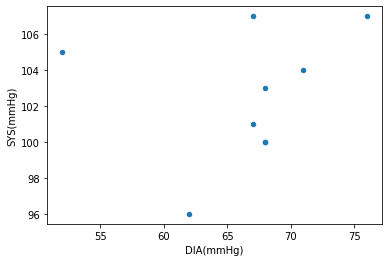

In [12]:
spacelabs.data.plot.scatter('DIA(mmHg)', 'SYS(mmHg)')

In [13]:
spacelabs.set_window(timedelta(seconds=30), 'bfill')

In [14]:
spacelabs.data.head(1)

,date,time,subject,SYS(mmHg),DIA(mmHg),x,y,z,error,stress_test,window_start,window_end
datetime,,,,,,,,,,,,
2019-03-01 15:18:00,2019-03-01,16:18:00,001V0,107,76,78.0,78.0,NaN,NaN,NaN,2019-03-01 15:17:30,2019-03-01 15:18:00


### Read Shimmer Consensys GSR (Shimmer3 GSR Development Kit)

In [15]:
shimmer_plus = devicely.ShimmerPlusReader(shimmer_file, delimiter=';', timeshift=1)

In [16]:
shimmer_plus.data.head(1)

,Shimmer_40AC_Timestamp_Unix_CAL,Shimmer_40AC_Accel_LN_X_CAL,Shimmer_40AC_Accel_LN_Y_CAL,Shimmer_40AC_Accel_LN_Z_CAL,Shimmer_40AC_Accel_WR_X_CAL,Shimmer_40AC_Accel_WR_Y_CAL,Shimmer_40AC_Accel_WR_Z_CAL,Shimmer_40AC_Battery_CAL,Shimmer_40AC_Ext_Exp_A15_CAL,Shimmer_40AC_GSR_Range_CAL,...,Shimmer_40AC_Gyro_X_CAL,Shimmer_40AC_Gyro_Y_CAL,Shimmer_40AC_Gyro_Z_CAL,Shimmer_40AC_Int_Exp_A12_CAL,Shimmer_40AC_Mag_X_CAL,Shimmer_40AC_Mag_Y_CAL,Shimmer_40AC_Mag_Z_CAL,Shimmer_40AC_Pressure_BMP280_CAL,Shimmer_40AC_Temperature_BMP280_CAL,acc_mag
time,,,,,,,,,,,,,,,,,,,,,
2020-07-28 11:56:50.034,1.595933810034E12,-1.434782608695652,10.0,0.5543478260869565,-3.9305804907241173,8.42130460801915,-1.620586475164572,4139.194139194139,1684.9816849816848,2.0,...,0.13740458015267176,1.8778625954198473,-0.183206106870229,1680.5860805860805,-0.11244377811094453,-0.9160419790104948,-0.047976011994003,100.43537920858897,33.365877509029815,10.117604


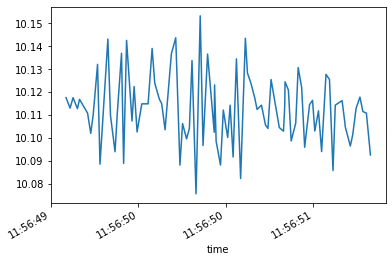

In [17]:
shimmer_plus.data['acc_mag'].interpolate(method="time").plot()